<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_2_1_m%C3%A9triques_r%C3%A9gression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métriques modèle régression



In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples = 100,
                       n_features = 3,
                       n_informative = 2,
                       n_targets = 1,
                       noise = 50,
                       coef = False,
                       random_state = 1)

model = LinearRegression()


## MSE


$$MSE(y,\hat y)={1\over m}\sum_{i=1}^m (y_i-\hat y_i)^2$$

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

model.fit(X_train,y_train)

mean_squared_error(model.predict(X_test),y_test)


3058.900408143835

**Question** Calculer à la main la MSE.

In [4]:
E = model.predict(X_test) - y_test
S = E**2
M = S.mean()
M

3058.900408143835

In [5]:
cross_val_score(model, X, y, scoring='neg_mean_squared_error')

array([-2914.05749614, -3213.77566901, -2245.14812078, -3141.0813493 ,
       -4396.93388687])

## MAE

**Question** Calculer à la main la MAE.

In [9]:
E = model.predict(X_test) - y_test
A = abs(E)
M = S.mean()
M


3058.900408143835

In [10]:
cross_val_score(model, X, y, scoring='neg_mean_absolute_error')

array([-43.3660157 , -44.9280652 , -37.83853674, -36.84080219,
       -58.04134761])

## Variance expliquée

In [11]:
from sklearn.metrics import explained_variance_score

cross_val_score(model, X, y, scoring='explained_variance')


array([0.44612691, 0.59616659, 0.7612131 , 0.54028193, 0.56797205])

## R2

In [12]:
cross_val_score(model, X, y, scoring='r2')

array([0.31685452, 0.53497568, 0.76115698, 0.52962916, 0.38924881])

## MAPE

**Question** Calculer la MAPE.

In [13]:
E = model.predict(X_test) - y_test
P = sum(E) / len(E)
A = abs(P)
M = S.mean()
M

3058.900408143835

# Quartet d'Anscombe

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]


x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]


## Visualisation

**Question** Visualiser les 4 séries de données.

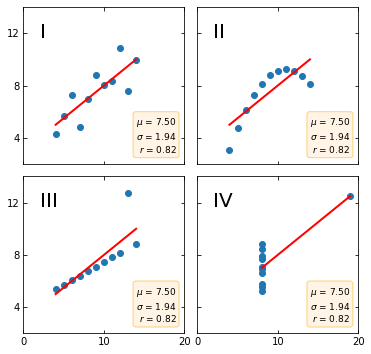

In [15]:
datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)
    x_lin = np.array([np.min(x), np.max(x)])
    y_lin = p1 * x_lin + p0
    ax.plot(x_lin, y_lin, 'r-', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

## Statistiques

**Question** Calculer les différents éléments statistiques : moyenne, écart-type, corrélation.

In [24]:
moy1 = sum(x)/ len(x)
print("moy x", moy1)
moy2 = sum(y1)/ len(y1)
print("moy y1",moy2)
moy3 = sum(y2)/ len(y2)
print("moy y2",moy3)
moy4 = sum(y3)/ len(y3)
print("moy y3",moy4)
moy5 = sum(x4)/ len(x4)
print("moy x4",moy5)
moy6 = sum(y4)/ len(y4)
print("moy y4",moy6)
s1 = np.array(x)
print("std x : ", np.std(s1))
s2 = np.array(y1)
print("std y1 : ", np.std(s2))
s3 = np.array(y2)
print("std y2 : ", np.std(s3))
s4 = np.array(y3)
print("std y3 : ", np.std(s4))
s5 = np.array(x4)
print("std x4 : ", np.std(s5))
s6 = np.array(y4)
print("std y4 : ", np.std(s6))

moy x 9.0
moy y1 7.500909090909093
moy y2 7.500909090909091
moy y3 7.500000000000001
moy x4 9.0
moy y4 7.50090909090909
std x :  3.1622776601683795
std y1 :  1.937024215108669
std y2 :  1.93710869148962
std y3 :  1.9359329439927313
std x4 :  3.1622776601683795
std y4 :  1.9360806451340837


## Régression linéaire

**Question** Créer les 4 modèles de régression linéaire. Calculer les différentes métriques d'évaluation.

In [32]:
import pandas as pd

model1 = LinearRegression()
res = pd.DataFrame(x)
res1 = pd.DataFrame(y1)
model1.fit(res,res1)
p1 = model1.predict(res)
print(" mse model 1 : ",mean_squared_error(p1,res1))
print("validation croisée model 1 :", cross_val_score(model1, res, res1, scoring='neg_mean_absolute_error'))

model2 = LinearRegression()
res2 = pd.DataFrame(y2)
model2.fit(res,res2)
p2 = model2.predict(res)
print(" mse model 2 : ",mean_squared_error(p2,res2))
print("validation croisée model 2 :", cross_val_score(model2, res, res2, scoring='neg_mean_absolute_error'))


model3 = LinearRegression()
res3 = pd.DataFrame(y3)
model3.fit(res,res3)
p3 = model3.predict(res)
print(" mse model 3 : ",mean_squared_error(p3,res3))
print("validation croisée model 3 :", cross_val_score(model3, res, res3, scoring='neg_mean_absolute_error'))

model4 = LinearRegression()
res4 = pd.DataFrame(x4)
res44 = pd.DataFrame(y4)
model4.fit(res4,res44)
p4 = model4.predict(res4)
print(" mse model 4 : ",mean_squared_error(p4,res44))
print("validation croisée model 4 :", cross_val_score(model4, res4, res44, scoring='neg_mean_absolute_error'))

 mse model 1 :  2.701713636363637
validation croisée model 1 : [-0.48809524 -0.93125    -1.36       -3.29       -3.21875   ]
 mse model 2 :  1.8155900000000003
validation croisée model 2 : [-1.04619048 -1.3425     -1.0325     -3.015      -2.42625   ]
 mse model 3 :  3.3026263636363637
validation croisée model 3 : [-2.08904762 -0.35       -1.38       -1.38       -2.045     ]
 mse model 4 :  1.249317272727273
validation croisée model 4 : [-0.83571429 -2.0675     -1.07       -3.47       -0.51      ]
